# Data exploring relationships

## Main steps carried out:

### 1. Import libraries
### 2. Import Data 
### 3. Exploring Relationships and visual analysis
### 4. Revisit the questions
### 5. Add new questions
### 6. Define any hypotheses

### 1. Import libraries

In [60]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [61]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [62]:
# Creating a path for faster import and export
path=r"C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 14-15\2023-10-09 Airbnb Amsterdam"

In [63]:
# Created charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

### 2. Import Data

In [64]:
# Import datafarme
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [65]:
# Output check df_list
df.shape

(8386, 16)

In [66]:
df.head()

,Unnamed: 0,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26
1,1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6
2,2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43
3,3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0
4,4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110


### 3. Exploring Relationships and visual analysis

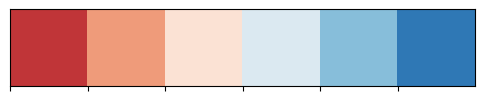

In [67]:
# Set the color palette to "RuBu"
palette = sns.color_palette("RdBu")

# Plot the palette
sns.palplot(palette)

# Create a new colormap from the custom color palette
palette_cmap = sns.color_palette(palette, as_cmap=True)

# Set the custom color palette for Matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)

In [68]:
# Dataframe with no text column inside
df_1=df[['id','host_id','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

In [69]:
# correlation matrix
# the relationships between the variables

df_1.corr()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.276287,0.071652,-0.015443,-0.280361,0.054092,0.002702,0.096768,-0.141990
host_id,0.276287,1.000000,0.017587,-0.007744,-0.075038,0.145691,0.166491,0.174281,0.052862
price,0.071652,0.017587,1.000000,-0.003496,-0.072651,-0.075372,0.004016,0.104383,-0.050313
minimum_nights,-0.015443,-0.007744,-0.003496,1.000000,-0.018017,-0.023060,0.027488,-0.006870,-0.023191
number_of_reviews,-0.280361,-0.075038,-0.072651,-0.018017,1.000000,0.728991,0.029863,0.167279,0.796161
reviews_per_month,0.054092,0.145691,-0.075372,-0.023060,0.728991,1.000000,0.095792,0.218077,0.908094
calculated_host_listings_count,0.002702,0.166491,0.004016,0.027488,0.029863,0.095792,1.000000,0.279274,0.068554
availability_365,0.096768,0.174281,0.104383,-0.006870,0.167279,0.218077,0.279274,1.000000,0.200715
number_of_reviews_ltm,-0.141990,0.052862,-0.050313,-0.023191,0.796161,0.908094,0.068554,0.200715,1.000000


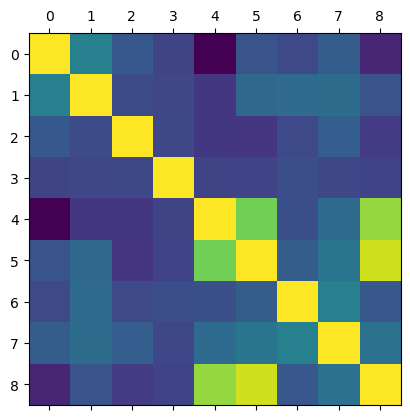

In [70]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_1.corr())
plt.show()

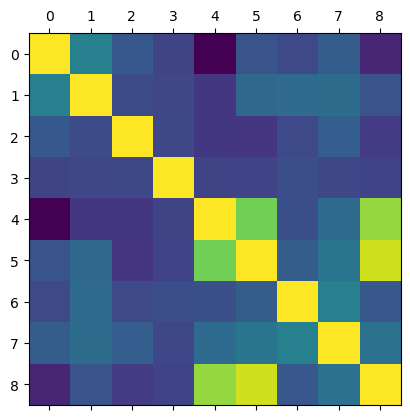

In [71]:
# Save figure
plt.matshow(df_1.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 

In [72]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\olilo\\OneDrive\\Dokumente\\CF\\Data Analytics Immersion_Week 14-15\\2023-10-09 Airbnb Amsterdam\\03 Scripts'

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

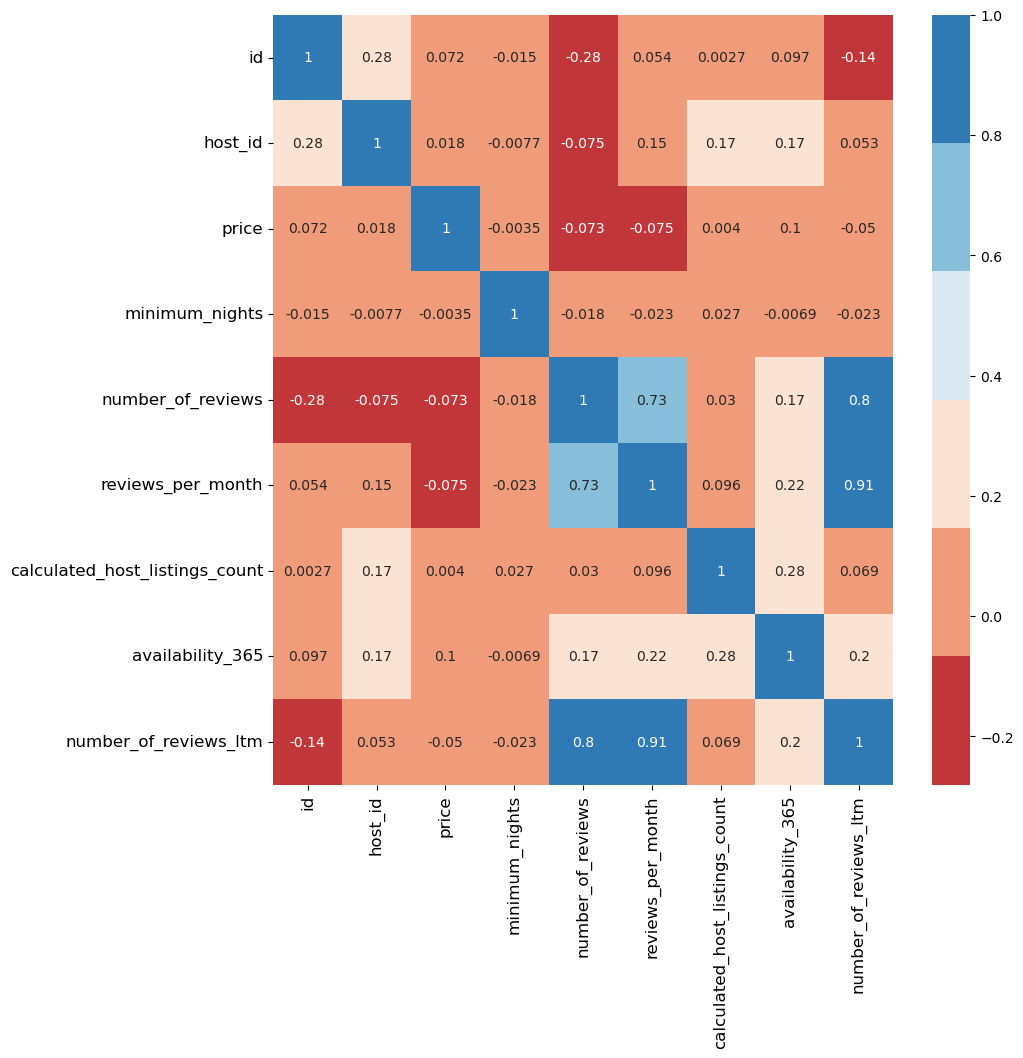

In [73]:
# Define the custom color palette
redblue = ['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']

# Create a new colormap from the custom color palette
redblue_cmap = sns.color_palette(redblue, as_cmap=True)

# Correlation map
fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure and axis

# Calculate the correlation matrix
corr_matrix = df_1.corr()

plt.xticks(range(df_1.shape[1]), df_1.columns, fontsize=12, rotation=90)
plt.yticks(range(df_1.shape[1]), df_1.columns, fontsize=12)

# Create a correlation heatmap using Seaborn with the custom color palette
sns.heatmap(corr_matrix, cmap=redblue_cmap, annot=True, ax=ax)  # Specify the axis for the heatmap

# Add a color legend
cb = plt.colorbar(ax=ax)  # Specify the axis for the colorbar
cb.ax.tick_params(labelsize=10)

plt.title('Correlation Matrix', fontsize=12)
plt.savefig("Corr_df_1.png")  # Save the plot as an image

# Show the plot
plt.show()


There are certain variables that have a strong correlation, these are the columns in the aqua circle, reviews per month, reviews per month ltm as well as the number of revisions, i.e. all the columns that tell us the assessment. They have a strong relationship, several factors contribute to a very low correlation, and most of them have negative values, which means that there is an absolute lack of relationship between the values. This shows that most of the data has no direct impact on itself and it will be important to look at all aspects.

Create a correlation heatmap using seaborn

Scatterplots

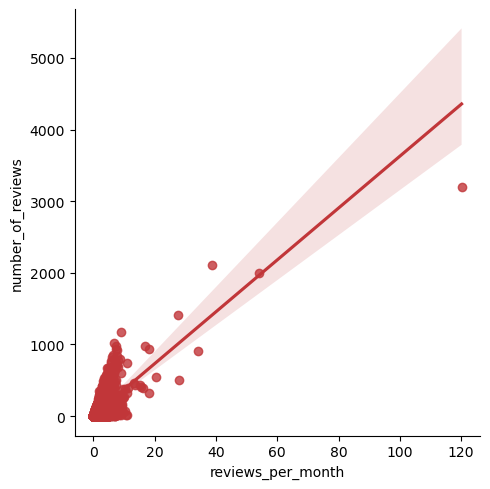

In [74]:
# Create a scatterplot 
sns.lmplot(x = 'reviews_per_month', y = 'number_of_reviews', data = df_1)

There is a correlation and a linear upward trend is visible. The cluster is in the lower left corner, with a scale of 15 reviews per month and the number of reviews. The conclusion is that the more opinions there are in a given month for a given object, the greater their number.

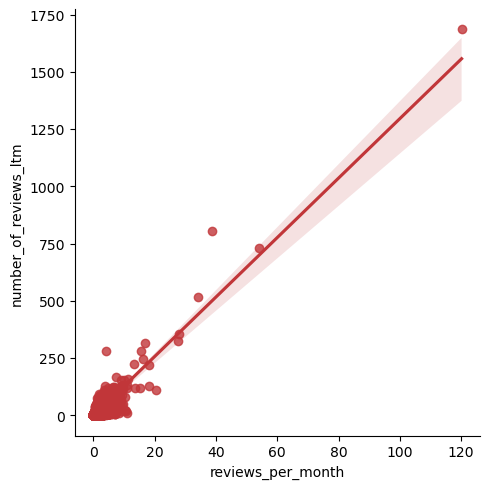

In [75]:
# Create a scatterplot 
sns.lmplot(x = 'reviews_per_month', y = 'number_of_reviews_ltm', data = df_1)

There is an evident correlation and linear trend. Also, there is a larger cluster of data in the lower left corner, with a scale of up to 15 reviews per month and the number of reviews, so the higher the number, the greater it is. The number of reviews the listing has in the last 12 months.

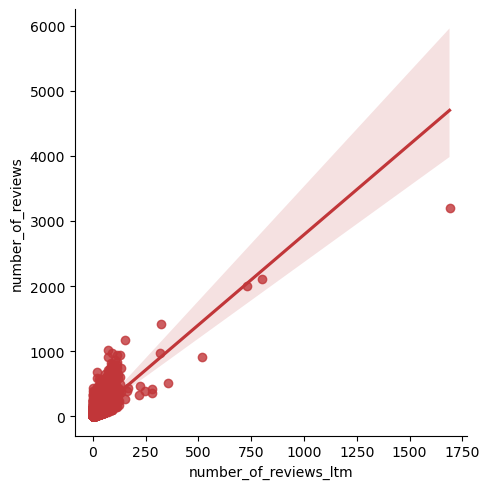

In [76]:
# Create a scatterplot 
sns.lmplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', data = df_1)

There is an evident correlation and an increased linear trend.

Pair Plots

In [77]:
# Keep only the variables you want to use in the pair plot
sub_1=df_1[['host_id','calculated_host_listings_count']]
sub_2=df_1[['price','number_of_reviews']]
sub_3=df_1[['price','availability_365']]
sub_4=df_1[['reviews_per_month','availability_365']]
sub_5=df_1[['price','minimum_nights']]
sub_6=df_1[['price','reviews_per_month','availability_365']]

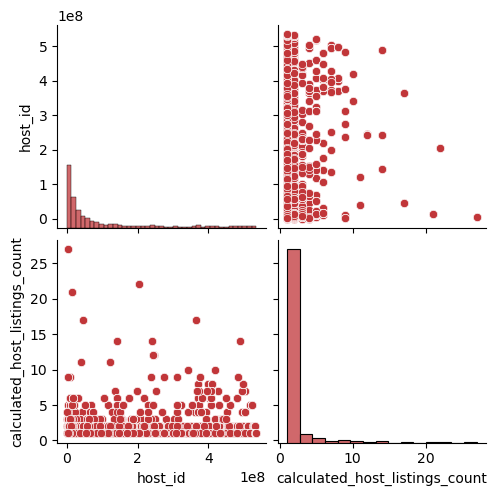

In [78]:
# Create a pair plot 
g = sns.pairplot(sub_1)

The relationship between host_id and calculated_host_listings_count is visible. This indicates that the owner has more than one object listed on the platform.

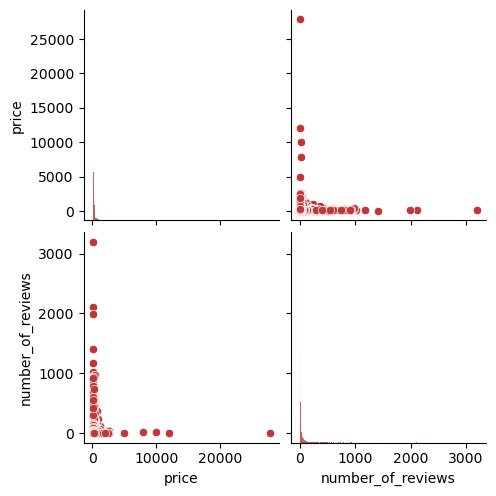

In [79]:
# Create a pair plot 
g = sns.pairplot(sub_2)

Judging by this graphic, a low price has an impact on the number of ratings written by customers.

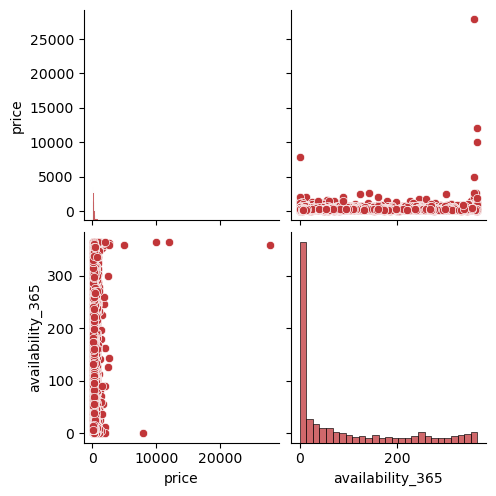

In [80]:
# Create a pair plot
g = sns.pairplot(sub_3)

Judging by this graphic, a low price has an impact on how often the object is available to the customer. Here too, a lower price cut has a higher impact.

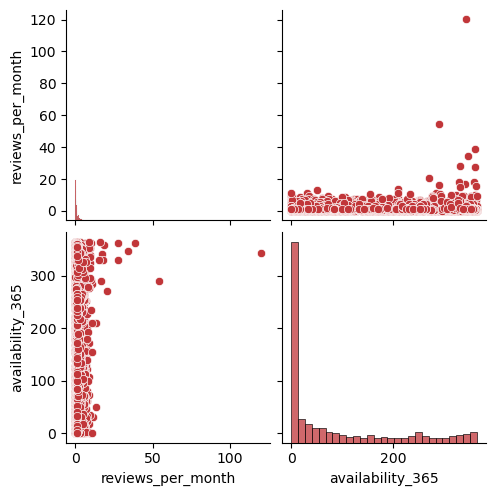

In [81]:
# Create a pair plot
g = sns.pairplot(sub_4)

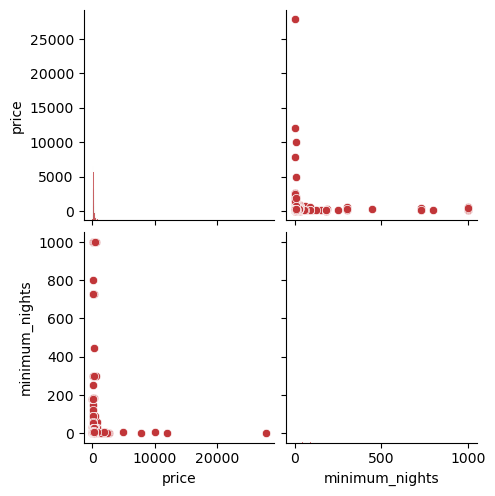

In [82]:
# Create a pair plot
g = sns.pairplot(sub_5)

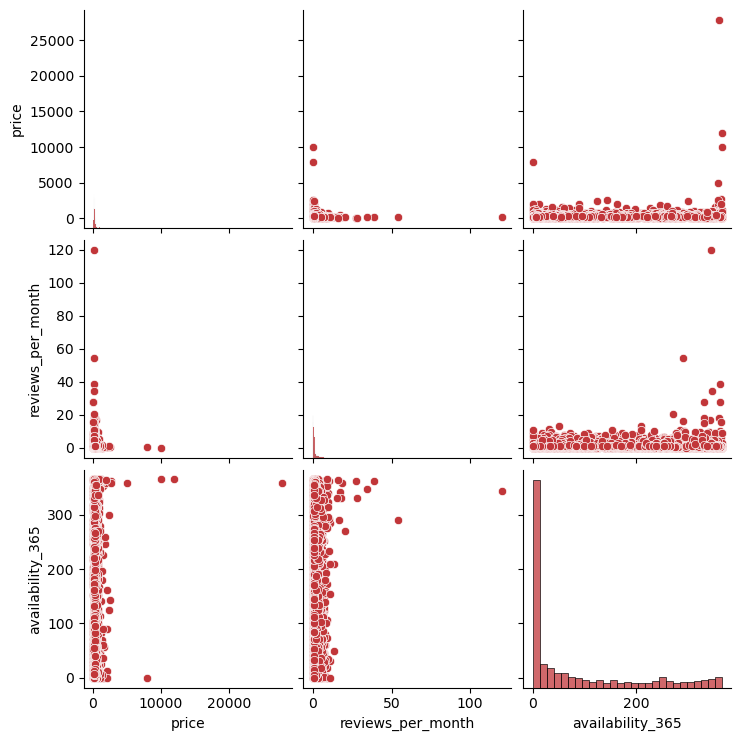

In [83]:
# Create a pair plot
g = sns.pairplot(sub_6)

Connection described above.

1. Which part of the city is most popular and which is the least popular?

In [84]:
# Columns needed to answer this question
city_part=df[['id','neighbourhood','latitude','longitude']]

In [85]:
# Added this line, importing this line to change the charts
# Help finded online
import matplotlib.ticker as ticker  

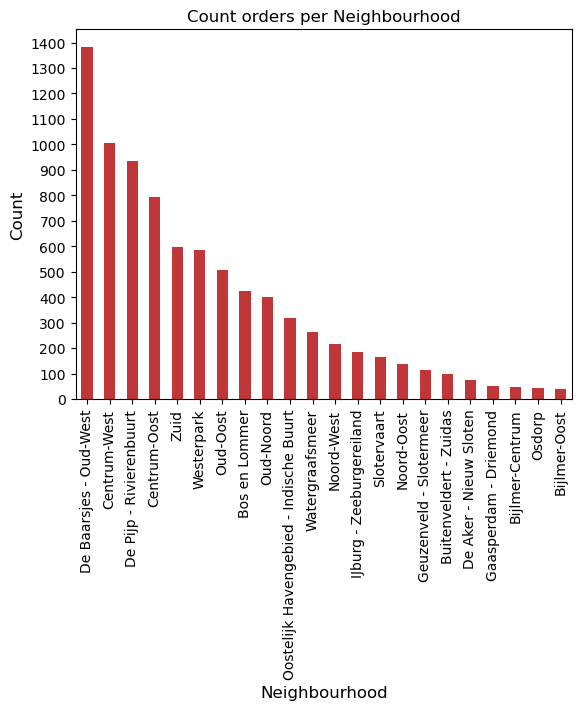

In [86]:
# Code for saving the bar chart within the bar object
bar_city_part = city_part['neighbourhood'].value_counts().plot.bar()

plt.xlabel("Neighbourhood", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count orders per Neighbourhood", fontsize=12)

# Set y-axis scale to increments of 100 counts
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))

In [87]:
# Export the visualization
bar_city_part.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_city_part.png'))

2. What price range per night is appropriate to make a profit

In [88]:
# Columns needed to answer this question
price_night=df[['id','price','minimum_nights']]

In [89]:
# Printing the numbers with count conclusion of 
price_night['price'].value_counts().sort_index()

price
18       2
31       1
32       1
35       1
39       2
        ..
5000     1
7900     1
10000    1
12000    1
27857    1
Name: count, Length: 631, dtype: int64

In [90]:
# Create the 'price_groups' column
price_night.loc[(price_night['price'] >= 18) & (price_night['price'] <= 60), 'price_groups'] = '18-60'

C:\Users\olilo\AppData\Local\Temp\ipykernel_15088\2158203046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_night.loc[(price_night['price'] >= 18) & (price_night['price'] <= 60), 'price_groups'] = '18-60'


In [91]:
price_night.loc[(price_night['price'] >= 61) & (price_night['price'] <= 120), 'price_groups'] = '61-120'

In [92]:
price_night.loc[(price_night['price'] >= 121) & (price_night['price'] <= 200), 'price_groups'] = '121-200'

In [93]:
price_night.loc[(price_night['price'] >= 201) & (price_night['price'] <= 500), 'price_groups'] = '201-500'

In [94]:
price_night.loc[price_night['price'] >= 501, 'price_groups'] = '500+'

In [95]:
# Printing the numbers with count conclusion of 
price_night['price_groups'].value_counts(dropna = False, ascending=True)

price_groups
18-60        79
500+        429
61-120     1170
121-200    2825
201-500    3883
Name: count, dtype: int64

In [96]:
# Define the custom order for 'price_groups'
price_groups_order = ['18-60', '61-120', '121-200', '201-500', '500+']

# Apply the custom order to the 'price_groups' column
price_night['price_groups'] = pd.Categorical(price_night['price_groups'], categories=price_groups_order, ordered=True)

C:\Users\olilo\AppData\Local\Temp\ipykernel_15088\4245611146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_night['price_groups'] = pd.Categorical(price_night['price_groups'], categories=price_groups_order, ordered=True)


In [97]:
# Printing the numbers with count conclusion of 
price_night['minimum_nights'].value_counts(dropna = False, ascending=True)

minimum_nights
800        1
45         1
150        1
87         1
1001       1
22         1
444        1
120        1
17         1
75         1
728        1
11         1
65         1
19         1
186        1
182        1
250        1
100        1
55         1
91         1
93         1
729        2
31         2
26         2
27         2
90         3
60         3
300        3
13         5
180        5
29         5
1000       6
15        11
9         12
8         15
12        16
25        18
20        21
21        25
28        34
30        34
14        46
10        60
6        143
7        294
5        544
4        869
1       1364
3       2380
2       2441
Name: count, dtype: int64

In [98]:
# Printing the numbers with count conclusion of 
min_night=price_night['minimum_nights'].value_counts(dropna = False, ascending=True)

C:\Users\olilo\AppData\Local\Temp\ipykernel_15088\2167197826.py:8: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(


ValueError: RGBA sequence should have length 3 or 4

Error in callback <function _draw_all_if_interactive at 0x0000029983359080> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

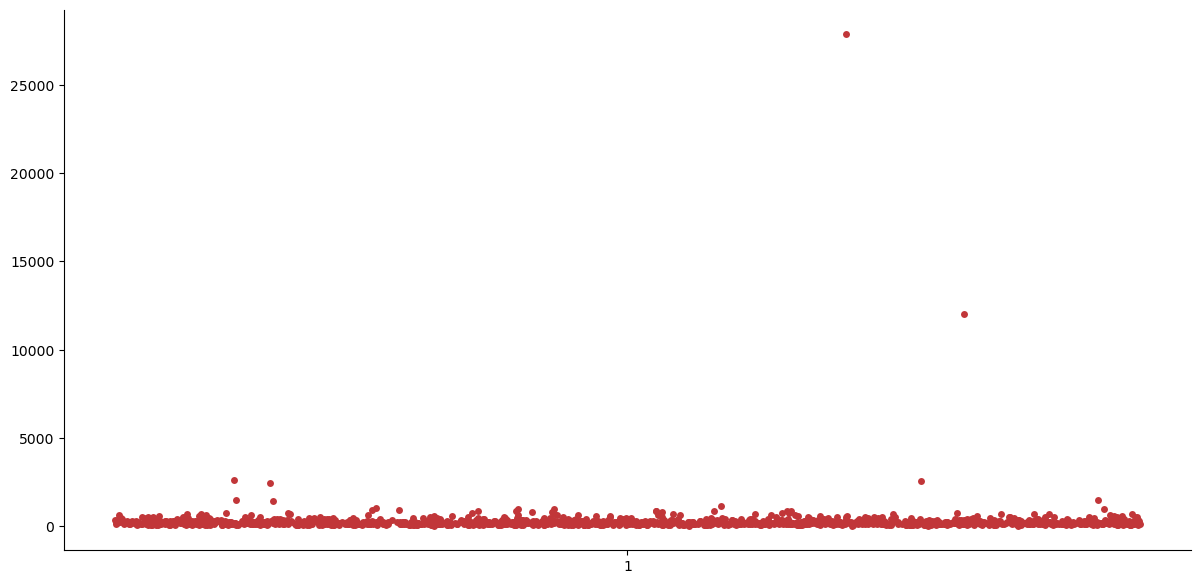

In [112]:
# Define the custom color palette
RdBu = [['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']]

# Create a new colormap from the custom color palette
RdBu_cmap = sns.color_palette(RdBu, as_cmap=True)

# Create a scatterplot with the custom color palette and adjust size
g = sns.catplot(
    x='minimum_nights',
    y='price',
    hue='price_groups',
    data=price_night,
    palette=RdBu_cmap,
    order=sorted(price_night['minimum_nights'].unique()),
    height=6,
    aspect=2
)

# Customize the plot
g.fig.suptitle("Scatterplot of Price and Minimum Nights", fontsize=12)  # Add a title
g.set_axis_labels("Minimum Nights", "Price")

# Rotate the x-axis description 90 degrees
g.set_xticklabels(rotation=90)

# Saving it
plt.savefig("scatterplot.png")

# Show the plot
plt.show()

Scatterplot presents five price groups and their relationship to the number of nights of rental. As we can see, the majority of color points are in the average price group.

<Axes: xlabel='price_groups', ylabel='Count'>

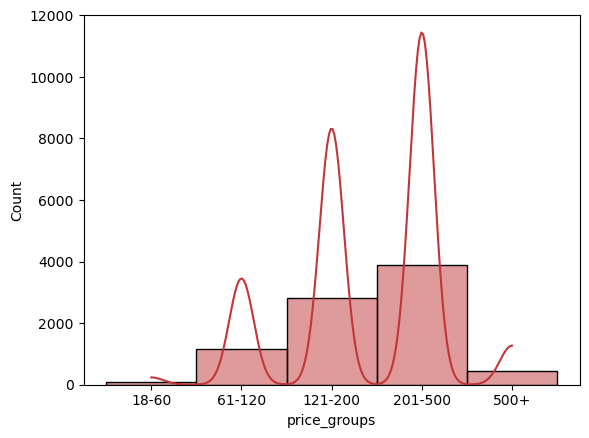

In [101]:
# Create a visualization
sns.histplot(price_night['price_groups'], bins = 10, kde = True)

3. What is the average rent?

In [102]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8386.000000,8.386000e+03,8.386000e+03,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,7556.000000,8386.000000,8386.000000,8386.000000
mean,4192.500000,2.973884e+17,1.077878e+08,52.366603,4.889834,254.489864,5.046625,45.437753,1.175696,1.831624,82.825066,10.848080
std,2420.974012,3.905819e+17,1.448316e+08,0.017191,0.035403,395.468275,34.710395,107.352805,2.253706,2.857336,113.568083,30.815465
min,0.000000,2.818000e+03,3.159000e+03,52.290340,4.755870,18.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2096.250000,1.851464e+07,1.025536e+07,52.355640,4.865501,150.000000,2.000000,3.000000,0.270000,1.000000,0.000000,0.000000
50%,4192.500000,4.242761e+07,3.642318e+07,52.365769,4.887580,207.000000,3.000000,10.000000,0.580000,1.000000,18.000000,3.000000
75%,6288.750000,7.227894e+17,1.444334e+08,52.376440,4.908708,300.000000,4.000000,36.000000,1.240000,1.000000,142.000000,8.000000
max,8385.000000,9.722182e+17,5.349544e+08,52.425159,5.026430,27857.000000,1001.000000,3199.000000,120.110000,27.000000,365.000000,1689.000000


4. Which real estate properties are the most popular, top 100 ?
5. How often are facilities in the top 100 rented? How many days a year are they rented?

In [103]:
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [104]:
# Finding top 100
# Sort the dataframe by the `number_of_reviews` column in descending order
df_number_of_reviews = df.sort_values(by='number_of_reviews', ascending=False)

# Select the top 100 rows
top_100_reviews = df_number_of_reviews[:100]

# Print the top 100
print(top_100_reviews)

      Unnamed: 0        id                                               name  \
4746        4746  50383849  Hotel in Amsterdam · ★4.66 · 1 bedroom · 1 bed...   
3382        3382  32485135     Hotel in Amsterdam · ★4.84 · 1 bedroom · 1 bed   
4396        4396  45045046  Boutique hotel in Amsterdam · ★4.74 · 1 bedroo...   
3657        3657  35927687  Hostel in Amsterdam · ★4.51 · 1 bedroom · 2 be...   
159          159    802052  Boat in Amsterdam · ★4.93 · 1 bedroom · 1 bed ...   
23            23     82482  Guesthouse in Amsterdam · ★4.51 · Studio · 2 b...   
155          155    785432  Rental unit in Amsterdam · ★4.77 · 2 bedrooms ...   
3244        3244  30762441  Serviced apartment in Amsterdam · ★4.78 · 2 be...   
166          166    851044  Rental unit in Amsterdam · ★4.75 · 2 bedrooms ...   
3629        3629  35632344  Hostel in Amsterdam · ★4.60 · 1 bedroom · 4 be...   
368          368   1814121  Bed and breakfast in Amsterdam · ★4.73 · 1 bed...   
4758        4758  50452179  

In [108]:
# Finding top 100
# Sort the dataframe by the `number_of_reviews` column in descending order
df_reviews_ltm = df.sort_values(by='number_of_reviews_ltm', ascending=True)

# Select the top 100 rows
top_100_number_of_reviews_ltm = df_reviews_ltm[:100]

# Print the top 100
print(top_100_number_of_reviews_ltm)

      Unnamed: 0                  id  \
8385        8385  972218247170836285   
2886        2886            26326181   
2888        2888            26380594   
2891        2891            26465711   
2892        2892            26482715   
7853        7853  925846276691817468   
2898        2898            26519263   
2900        2900            26560199   
2910        2910            26728654   
2913        2913            26744905   
2885        2885            26314462   
2915        2915            26761013   
2924        2924            26826637   
2931        2931            26869538   
2932        2932            26879765   
2935        2935            26907262   
2938        2938            26941891   
2939        2939            26950128   
2941        2941            26974042   
2944        2944            27020496   
2946        2946            27041918   
2919        2919            26781206   
2947        2947            27053257   
2880        2880            26292322   


In [109]:
# Find the repeated rows
repeated_rows_top_100 = top_100_reviews.merge(top_100_number_of_reviews_ltm, how='inner', indicator=True).query('_merge=="both"')

# Print the number of repeated rows
print(len(repeated_rows_top_100))

# Print the repeated rows
print(repeated_rows_top_100)

0
Empty DataFrame
Columns: [Unnamed: 0, id, name, host_id, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, _merge]
Index: []


In [110]:
# Export the new dataframe
top_100_reviews.to_csv(os.path.join(path, '02 Data','Prepared Data', 'top_100_reviews.csv'))

In [111]:
# Export the new dataframe
top_100_number_of_reviews_ltm.to_csv(os.path.join(path, '02 Data','Prepared Data', 'top_100_number_of_reviews_ltm.csv'))

### 4. Revisit the questions

Answer in PDF-file 'Exploring Relationships'

### 5. Add new questions

Answer in PDF-file 'Exploring Relationships'

### 6. Define any hypotheses

Answer in PDF-file 'Exploring Relationships'